In [1]:
import numpy as np
import pandas as pd
import nltk
import re

import matplotlib.pyplot as plt


## Reading the Data and Looking at the Head

In [2]:
pd_f = pd.read_csv("McDonalds-Yelp-Sentiment-DFE.csv", encoding = "ISO-8859-1")
pd_f.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."


###  Column names of the original data

In [3]:
pd_f.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'policies_violated',
       'policies_violated:confidence', 'city', 'policies_violated_gold',
       'review'],
      dtype='object')

### Dimension of the original data (Shape)

In [4]:
pd_f.shape

(1525, 10)

## Columns of our interest

We throw away other columns of this dataset and just focus on "review" columns an dthe "label" column. 

In [5]:
selected =  pd_f.loc[:, ["review", "policies_violated"]] 

### Examples of reviews and the corresponding label 

Labels are given at the end of the reviews

In [6]:
for item in np.array(selected.head(5)):
    print(item)

["I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care."
 'RudeService\rOrderProblem\rFilthy']
['Terrible customer service. Î¾I came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. Î¾There was no one else waiting for their food inside either, just outside at the window. Î¾ I left and went to Chickfila next door and was greeted before I was all the way inside. This McDonalds is also dirty, the floor was covered with dropped food. Obviously filled with surly and unhappy workers.'
 'RudeService']
['First they "lost" my order, actually they gave it to someone one else than took 20 minutes to figure out why I was still waiting for my order.They after I was asked what I needed I replied, "my order".They asked for my ticket and 

### We use pd.loc to extract reviews as a list

In [7]:
raw_review = selected.loc[:, ["review"]] ## Gives the list of all reviews
raw_review = raw_review["review"]
raw_review[4] ## The fifth review in the dataset

'Well, it\'s McDonald\'s, so you know what the food is. Î¾This review reflects solely on the poor service. Î¾I have been to this location countless times over the years. Î¾They consistently fail on the service end of things. Î¾The order takers tend to be rude, no smiles, and a lot of "sighs" and "lip smacking" when you talk to them. Î¾So why go back you ask? This store benefits from being the only place to eat in this area. Î¾The next stop is at least 12 minutes away on the other side of town. Î¾Also I strongly believe in 2nd chances and know that not every business can satisfy everyone 100% of the time. Î¾I have given them many chances at earning a positive review. Î¾I could not recommend this location any less. Î¾If you can wait, take a pass. Î¾There are better McDonald\'s stores in Griffin, GA.'

## Exctracting Non-Alphanumeric and other Weird Characters!

In [8]:
weird_chars = []
for char in raw_review:
    weird_chars += re.findall(r"[^a-zA-Z0-9\s\w\.]", char.lower())
weird_char_list = list(set(weird_chars))
print(weird_char_list)

['$', '`', '\x92', '+', '(', '[', '±', '!', '?', '&', '=', '#', '-', '\x97', ',', ']', '^', "'", '\x8a', '"', '©', ';', '\\', '|', '/', '%', '@', ')', '~', ':', '*']


In [9]:
"".join(weird_char_list)

'$`\x92+([±!?&=#-\x97,]^\'\x8a"©;\\|/%@)~:*'

## Lowercasing, removing punctuations, and weird characters

In [10]:
proc_review = [re.sub(r"[Î¾î\'\\\%!\$\&\'()\*\+,\-\.\/:;<=>?@\[\]^_`{|}~]", "", item).lower() for item in raw_review]
proc_review[4] ## This does not have anymore any weird char

'well its mcdonalds so you know what the food is this review reflects solely on the poor service i have been to this location countless times over the years they consistently fail on the service end of things the order takers tend to be rude no smiles and a lot of "sighs" and "lip smacking" when you talk to them so why go back you ask this store benefits from being the only place to eat in this area the next stop is at least 12 minutes away on the other side of town also i strongly believe in 2nd chances and know that not every business can satisfy everyone 100 of the time i have given them many chances at earning a positive review i could not recommend this location any less if you can wait take a pass there are better mcdonalds stores in griffin ga'

## Replacing the review columns by the processed & clean reviews

In [11]:
selected[["review"]] = pd.DataFrame(proc_review)
selected[:10]

,review,policies_violated
0,im not a huge mcds lover but ive been to bette...,RudeService\rOrderProblem\rFilthy
1,terrible customer service i came in at 930pm a...,RudeService
2,"first they ""lost"" my order actually they gave ...",SlowService\rOrderProblem
3,i see im not the only one giving 1 star only b...,na
4,well its mcdonalds so you know what the food i...,RudeService
5,this has to be one of the worst and slowest mc...,BadFood\rSlowService
6,im not crazy about this mcdonalds this is prim...,SlowService\rScaryMcDs
7,one star and im beng kind i blame management l...,RudeService
8,never been upset about any fast food drive thr...,SlowService\rRudeService\rMissingFood
9,this mcdonalds has gotten much better usually ...,na


## Many Missing Values eith NA or NAN

We find all reviews with a missing label for them:

In [12]:
na_ind = [] ## list of reviews with na
multi_labels = [] ## lost of reviews  with multi labels
nan_ind = [] # List of reviews with nan
for i in range(len(selected)):
    if selected.loc[i, "policies_violated"] == "na":
        na_ind.append(i)
    else:
        try:
            if len(selected.loc[i, "policies_violated"].split("\r"))>1:
                multi_labels.append(i)
        except:
            nan_ind.append(i)
bad_ind = list(set(na_ind + nan_ind))
print("There are ", len(bad_ind), "bad indices \n")
print(bad_ind)

There are  349 bad indices 

[3, 9, 32, 36, 37, 38, 45, 49, 52, 53, 57, 60, 61, 63, 64, 66, 67, 71, 76, 77, 83, 84, 91, 95, 101, 102, 110, 117, 128, 151, 157, 161, 180, 184, 188, 207, 211, 218, 219, 228, 236, 245, 251, 253, 262, 265, 266, 267, 271, 278, 291, 295, 298, 306, 308, 309, 312, 318, 319, 320, 322, 325, 326, 327, 329, 332, 333, 339, 340, 345, 346, 356, 358, 361, 362, 363, 365, 366, 370, 377, 379, 383, 385, 386, 388, 397, 398, 400, 403, 405, 408, 409, 410, 415, 416, 418, 426, 427, 436, 447, 452, 456, 461, 462, 468, 469, 470, 474, 476, 480, 482, 485, 493, 494, 497, 499, 503, 504, 509, 511, 514, 518, 522, 544, 559, 561, 563, 565, 572, 575, 579, 581, 585, 589, 591, 595, 602, 608, 618, 623, 625, 626, 629, 634, 640, 641, 643, 659, 664, 668, 669, 671, 676, 677, 680, 684, 691, 692, 694, 698, 701, 713, 714, 722, 724, 734, 748, 749, 751, 755, 762, 763, 764, 772, 774, 778, 779, 783, 784, 787, 789, 797, 800, 801, 804, 806, 807, 810, 812, 814, 815, 817, 822, 824, 826, 835, 840, 850, 858, 8

## The reviews for these indices (missing labels):
* Do not have any meaning

* Or do not relate to the labels

### Some (ten) of these reviews

In [13]:
print("There are ", len(bad_ind), " Reviews with no labels: \n")
print("#############################################################\n")
for ind in bad_ind[:10]:
    print(selected.loc[ind, "review"], "\n")

There are  349  Reviews with no labels: 

#############################################################

i see im not the only one giving 1 star only because there is not a 25 star thats all i need to say 

this mcdonalds has gotten much better usually my order would be wrong every single time so i would not leave that window until i checked every single item i only hit up fast food once a month or so and it needs to be worth it also the fries used to be cold and the cheese on the burger was never melted everything was just lukewarm now my order has been right a few times in a row and my food hot also i love dining room usually you wouldnt find me actually inside a fast food joint but this place has nice flooring stacked stone lots of large windows and a flat screen tv usually on hln sometimes its nice to sneak away for a quick weekend breakfast you know a little budget and time friendly mommy and me date 

this has got to be one of the busiest mcdonalds in the metro area  if not the s

## Ignoring the reviews with missing labels

In [14]:
rest_ind= [i for i in range(len(selected)) if i not in bad_ind] # The rest of indices
my_final_data = selected.loc[rest_ind,:]
my_final_data # Fial clean data

,review,policies_violated
0,im not a huge mcds lover but ive been to bette...,RudeService\rOrderProblem\rFilthy
1,terrible customer service i came in at 930pm a...,RudeService
2,"first they ""lost"" my order actually they gave ...",SlowService\rOrderProblem
4,well its mcdonalds so you know what the food i...,RudeService
5,this has to be one of the worst and slowest mc...,BadFood\rSlowService
...,...,...
1520,i enjoyed the part where i repeatedly asked if...,OrderProblem
1521,worst mcdonalds ive been in in a long time dir...,SlowService\rFilthy\rBadFood
1522,when i am really craving for mcdonalds this se...,ScaryMcDs
1523,two points right out of the gate 1 thuggery kn...,ScaryMcDs


In [15]:
col_label = my_final_data["policies_violated"] ## The column containg labels

In [16]:
labels = list(set(col_label)) # Original labels
print("The number of original labels is ", len(labels))


The number of original labels is  145


## What are these labels? 

In [17]:
labels

['ScaryMcDs\rSlowService\rRudeService',
 'BadFood\rSlowService',
 'RudeService\rSlowService\rOrderProblem',
 'RudeService',
 'SlowService\rRudeService\rMissingFood',
 'Filthy\rBadFood',
 'OrderProblem\rMissingFood',
 'Filthy\rna',
 'RudeService\rScaryMcDs',
 'RudeService\rSlowService\rOrderProblem\rBadFood',
 'RudeService\rOrderProblem\rMissingFood\rBadFood',
 'Filthy\rCost\rSlowService',
 'BadFood\rOrderProblem',
 'SlowService\rCost\rScaryMcDs',
 'BadFood\rRudeService\rCost',
 'SlowService\rOrderProblem\rFilthy',
 'RudeService\rScaryMcDs\rMissingFood\rFilthy\rCost',
 'Cost\rBadFood\rOrderProblem',
 'RudeService\rOrderProblem\rBadFood\rFilthy',
 'SlowService\rOrderProblem\rBadFood',
 'Filthy\rRudeService\rOrderProblem',
 'Cost\rFilthy',
 'RudeService\rOrderProblem\rFilthy',
 'RudeService\rSlowService',
 'SlowService\rOrderProblem\rRudeService',
 'BadFood',
 'Filthy',
 'SlowService\rScaryMcDs',
 'SlowService\rMissingFood\rna\rScaryMcDs\rRudeService\rOrderProblem\rFilthy\rCost\rBadFood',

## Distribution of the Original (multi-) labels

In [18]:
dict_of_distrb = nltk.FreqDist(col_label)
sorted_raw_label_req = dict_of_distrb.most_common()
#sorted_raw_label_req = sorted(dict_of_distrb.items(), key = lambda x: x[1], reverse = True)
sorted_raw_label_req

[('RudeService', 177),
 ('SlowService', 127),
 ('OrderProblem', 116),
 ('BadFood', 101),
 ('ScaryMcDs', 71),
 ('SlowService\rRudeService', 56),
 ('RudeService\rOrderProblem', 53),
 ('Filthy', 43),
 ('OrderProblem\rRudeService', 29),
 ('RudeService\rBadFood', 27),
 ('SlowService\rOrderProblem', 26),
 ('RudeService\rSlowService', 19),
 ('MissingFood', 18),
 ('Cost', 16),
 ('OrderProblem\rSlowService', 14),
 ('BadFood\rRudeService', 13),
 ('SlowService\rBadFood', 12),
 ('OrderProblem\rBadFood', 11),
 ('RudeService\rFilthy', 10),
 ('BadFood\rOrderProblem', 9),
 ('BadFood\rSlowService', 8),
 ('Filthy\rBadFood', 7),
 ('Filthy\rRudeService', 7),
 ('SlowService\rRudeService\rOrderProblem', 7),
 ('ScaryMcDs\rRudeService', 7),
 ('RudeService\rScaryMcDs', 6),
 ('SlowService\rFilthy', 6),
 ('SlowService\rOrderProblem\rRudeService', 5),
 ('SlowService\rScaryMcDs', 4),
 ('BadFood\rCost', 4),
 ('ScaryMcDs\rBadFood', 4),
 ('RudeService\rSlowService\rOrderProblem', 4),
 ('RudeService\rMissingFood', 4),

## Many labels have frequency 1--Merging is a MUST
As it is noticable from the above distribution, we have several labels assigns to exactly one review. The data must be transformed and some labeles must be merged. 

### Reviews assigned with more than one label 

In [19]:
#selected.loc[multi_labels]
for item in np.array(selected):
    try:
        if item[1]!= "na" and len(item[1].split("\r")) > 1:
            print(item, "\n")
    except:
        continue
    

['im not a huge mcds lover but ive been to better ones this is by far the worst one ive ever been too its filthy inside and if you get drive through they completely screw up your order every time the staff is terribly unfriendly and nobody seems to care'
 'RudeService\rOrderProblem\rFilthy'] 

['first they "lost" my order actually they gave it to someone one else than took 20 minutes to figure out why i was still waiting for my orderthey after i was asked what i needed i replied "my order"they asked for my ticket and the asst mgr looked at the ticket then incompletely filled iti had to ask her to check to see if she filled it correctlyshe acted as if she couldnt be bothered with that so i asked her againshe begrudgingly checked to she did in fact miss something on the ticketso after 22 minutes i finally had my breakfast biscuit platteras i left an woman approached and identified herself as the manager she was dressed as if she had just awoken in an old tshirt and sweat pantsshe said sh

## Writing plot as a fucntion and calling this fucntion when plot needed! 

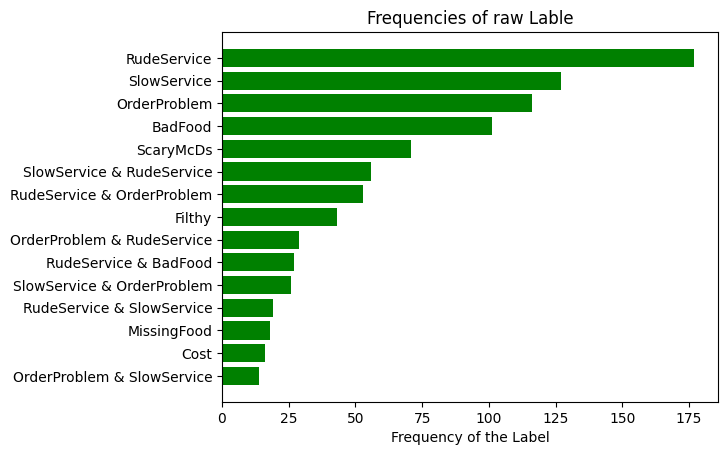

In [20]:
# Fixing random state for reproducibility

def freq_plotter(item_pair_freq, title):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_vals = [item[0] for item in item_pair_freq ]
    freq = [item[1] for item in item_pair_freq]
    y_pos = np.arange(len(y_vals))
    ax.barh(y_pos, freq,  align='center',
        color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_vals)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency of the Label')
    ax.set_title(title)

    plt.show()
    plt.close()
    



what_in_pic = sorted_raw_label_req[:15]
people = [(item[0].replace("\r", " & "), item[1]) for item in what_in_pic ]
freq_plotter(people, "Frequencies of raw Lable")


In [21]:
classes = set(sum( list(map(lambda x: x.split("\r"), labels)) , [] ))
classes # The 8 labels plus one for na/nan

{'BadFood',
 'Cost',
 'Filthy',
 'MissingFood',
 'OrderProblem',
 'RudeService',
 'ScaryMcDs',
 'SlowService',
 'na'}

## Frequency of each single label

In [22]:
classes = ['BadFood',  'Cost',  'Filthy', 'MissingFood', 'OrderProblem', 'RudeService', 'ScaryMcDs', 'SlowService']
term_freq = dict.fromkeys(classes, 0)
for item in np.array(col_label):
    try: 
        for lab in item.split("\r"):
            term_freq[lab]+=1
    except:
        continue
term_freq

{'BadFood': 255,
 'Cost': 49,
 'Filthy': 127,
 'MissingFood': 52,
 'OrderProblem': 333,
 'RudeService': 498,
 'ScaryMcDs': 126,
 'SlowService': 359}

## We have a very imbalanced data

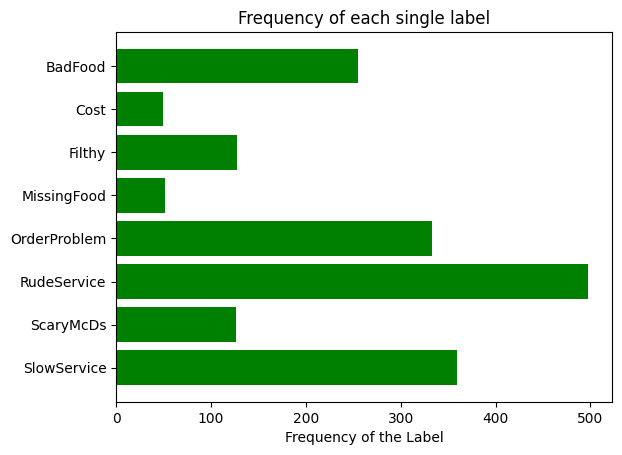

In [23]:
freq_plotter(term_freq.items(), "Frequency of each single label")

### We apply two transformation to convert multi-labels to a signle label
__Try to have a distrubution which is less imbalanced (closer to a uniform distribution)__

### What is the distribution if we projct every multi-label to the first label in the mixture?


In [24]:
def label_shortener_to_first(long_label):
    splited_labels = long_label.split("\r")
    if splited_labels[0] == "na": 
        return splited_labels[1]
    else:
        return splited_labels[0]
nltk.FreqDist(list(map(label_shortener_to_first, col_label)))

FreqDist({'RudeService': 328, 'SlowService': 284, 'OrderProblem': 192, 'BadFood': 150, 'ScaryMcDs': 99, 'Filthy': 72, 'Cost': 28, 'MissingFood': 23})

### Merging small classes to the larger ones

* Cost + MissingFood ----> ScaryMcDs 
* ScaryMcDs ----> Filthy


In [25]:
def label_shortener_uniform(long_label):
    splited_labels = long_label.split("\r")
    if "Filthy" in splited_labels:
        res = "Filthy"
    else:
        if splited_labels[0] == "na": 
            res = splited_labels[1]
        else:
            res = splited_labels[0]
    if res == "Cost":
        res = "OrderProblem"
    if res == "MissingFood":
        res = "OrderProblem"
    if res == "ScaryMcDs":
        res = "Filthy" # BadFood
    return res 
    
unif_labels = list(map(label_shortener_uniform, col_label))
nltk.FreqDist(unif_labels)

FreqDist({'RudeService': 308, 'SlowService': 263, 'OrderProblem': 234, 'Filthy': 226, 'BadFood': 145})

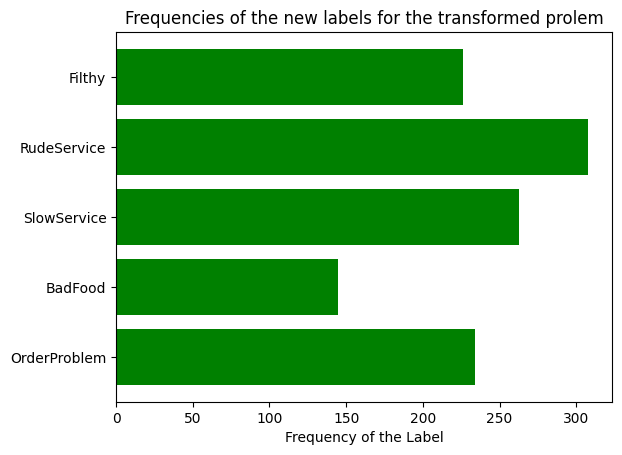

In [26]:
freq_plotter(nltk.FreqDist(unif_labels).items(), "Frequencies of the new labels for the transformed prolem")

## Baseline accuracy (predicting the most frequent label)

In [27]:
print("The baseline accuracy is: ", round(308/(145+226+234+308+263)*100, 2), "%")


The baseline accuracy is:  26.19 %


### Replace the multi-labels by the projcted label

In [28]:
my_final_data["new_column"] = unif_labels
my_final_data

,review,policies_violated,new_column
0,im not a huge mcds lover but ive been to bette...,RudeService\rOrderProblem\rFilthy,Filthy
1,terrible customer service i came in at 930pm a...,RudeService,RudeService
2,"first they ""lost"" my order actually they gave ...",SlowService\rOrderProblem,SlowService
4,well its mcdonalds so you know what the food i...,RudeService,RudeService
5,this has to be one of the worst and slowest mc...,BadFood\rSlowService,BadFood
...,...,...,...
1520,i enjoyed the part where i repeatedly asked if...,OrderProblem,OrderProblem
1521,worst mcdonalds ive been in in a long time dir...,SlowService\rFilthy\rBadFood,Filthy
1522,when i am really craving for mcdonalds this se...,ScaryMcDs,Filthy
1523,two points right out of the gate 1 thuggery kn...,ScaryMcDs,Filthy


## Saving the prcossed and projected data into a file

In [29]:
review_projected_label = my_final_data.loc[:, ["review", "new_column"]]
#for i in range(len(review_projected_label)):
#    print("this i is ", i)
#    print( (review_projected_label.loc[i, "review"], review_projected_label.loc[i, "new_column"]) )
#pair_review_proj_lab = [(review_projected_label.loc[i, "review"], review_projected_label.loc[i, "new_column"]) for i in range(len(review_projected_label))]
#pair_review_proj_lab
process_txt = []
for item in np.array(review_projected_label):
    process_txt.append(item[0] + "\t" + item[1] +"\n")

with open("processed_file.txt", "w", encoding='utf-8') as fh:
    fh.write("".join(process_txt))
fh.close()
    
    